In [204]:
import pathlib

path=str(pathlib.Path().resolve().parent)+"/Imagenes"

In [205]:
import cv2 as cv
from matplotlib import pyplot as plt

def resize(img,div,div2):
    x = img.shape[0]//div
    y = img.shape[1]//div2
    return cv.resize(img,(x,y))

pi = cv.imread((path+"/Piedra.jpg"))
pa = cv.imread((path+"/Papel.jpg"))
ti = cv.imread((path+"/Tijera.jpg"))
pi = pi[:,:,0]
pa = pa[:,:,0]
ti = ti[:,:,0]

#pi = cv.transpose(resize(pi,8,4))
#pa = resize(pa,4,8)
#ti = resize(ti,4,8)
pi = cv.transpose(pi)

#pi=(cv.cvtColor(pi,cv.COLOR_BGR2GRAY))
#pa=(cv.cvtColor(pa,cv.COLOR_BGR2GRAY))
#ti=(cv.cvtColor(ti,cv.COLOR_BGR2GRAY))


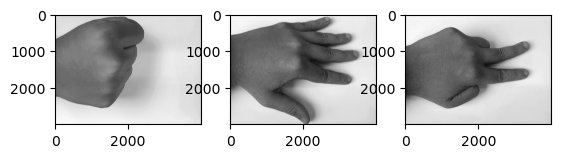

In [206]:
from matplotlib import pyplot as plt
import numpy as np


fig,axs = plt.subplots(1,3)


axs[0].imshow(pi,cmap="gray")
axs[1].imshow(pa,cmap="gray")
axs[2].imshow(ti,cmap="gray")

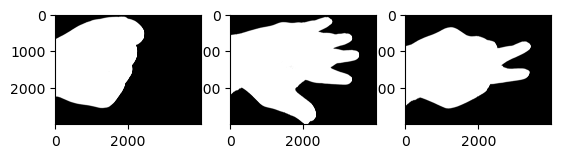

In [207]:
ret,th1 = cv.threshold(pi,137, 255,cv.THRESH_BINARY_INV)
ret,th2 = cv.threshold(pa,147, 255,cv.THRESH_BINARY_INV)
ret,th3 = cv.threshold(ti,147, 255,cv.THRESH_BINARY_INV)

fig,axs = plt.subplots(1,3)
axs[0].imshow(th1,cmap="gray")
axs[1].imshow(th2,cmap="gray")
axs[2].imshow(th3,cmap="gray")

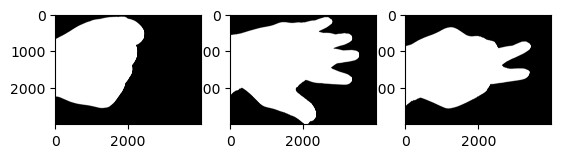

In [208]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))


imgPi = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel, iterations=1)
imgPi = cv.morphologyEx(imgPi, cv.MORPH_OPEN, kernel, iterations=1)

imgPa = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel, iterations=1)
imgPa = cv.morphologyEx(imgPa, cv.MORPH_OPEN, kernel, iterations=1)

imgTi = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations=1)
imgTi = cv.morphologyEx(imgTi, cv.MORPH_OPEN, kernel, iterations=1)

fig,axs = plt.subplots(1,3)
axs[0].imshow(imgPi,cmap="gray")
axs[1].imshow(imgPa,cmap="gray")
axs[2].imshow(imgTi,cmap="gray")

In [209]:

contornosPi,hPi=cv.findContours(imgPi, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contornosPa,hPa=cv.findContours(imgPa, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contornosTi,hTi=cv.findContours(imgTi, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

Centro: X:1137 Y:1274
RELACIÓN P/PH:1.0684871466256665
RELACIÓN A/P:534.8082452010173
4654208.0
8702.573383569717


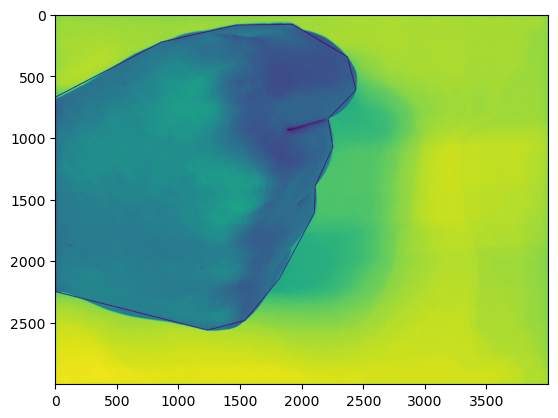

In [215]:


ax = plt.subplot()


def dibuja_contorno(axs,contornos,img,frame=None):
    approx=[]
    area=[]
    for contorno in contornos:
        M = cv.moments(contorno)
        if M['m00']:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            print(f"Centro: X:{cx} Y:{cy}")
            # BORDE MÁS REDONDEADO SI NO SERÍA YA PONIENDO EL CONTORNO
            perimetro = cv.arcLength(contorno,True)
            approx.append(cv.approxPolyDP(contorno,0.005*perimetro,True))
            area.append(cv.contourArea(contorno))
            hull = cv.convexHull(contorno)
    cv.drawContours(img,approx,-1,(0,255,0),5)
    if axs!=None:
        axs.imshow(img)
    if frame!=None:
        cv.namedWindow("Frame")
        cv.imshow("Frame", frame)
    
    perimetroH = cv.arcLength(hull,True)
    print(f"RELACIÓN P/PH:{perimetro/perimetroH}")
    print(f"RELACIÓN A/P:{sum(area)/perimetro}")
    return sum(area),hull,perimetro,perimetroH

areaPi,hullPi,perimetroPi,perimetroHPi=dibuja_contorno(ax,contornosPi,pi.copy())

print(areaPi)
print(perimetroPi)

Centro: X:1586 Y:1356
RELACIÓN P/PH:1.5057410960067728
RELACIÓN A/P:395.94189710117826
6248278.5
15780.796489953995


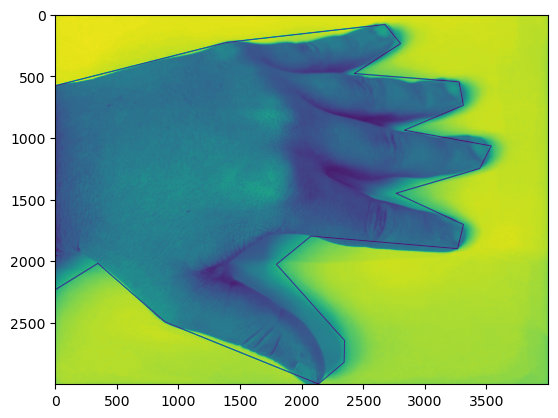

In [216]:
ax2 = plt.subplot()
areaPa,hullPa,perimetroPa,perimetroHPa=dibuja_contorno(ax2,contornosPa,pa.copy())

print(areaPa)
print(perimetroPa)

Centro: X:1440 Y:1459
Centro: X:147 Y:7
RELACIÓN P/PH:1.0200613892075772
RELACIÓN A/P:5691.341336663262
5051860.0
887.6396092176437


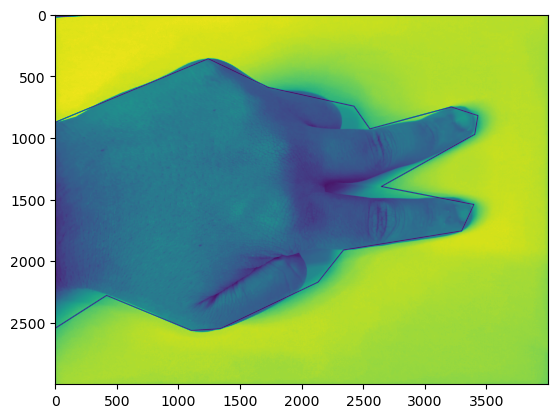

In [217]:
ax = plt.subplot()
areaTi,hullTi,perimetroTi,perimetroHTi=dibuja_contorno(ax,contornosTi,ti.copy())

print(areaTi)
print(perimetroTi)

In [213]:
print(areaPi/perimetroPi)
print(areaPa/perimetroPa)
print(areaTi/perimetroTi)

534.8082452010173
395.94189710117826
5691.341336663262


PH/P
A/P

In [233]:
video = cv.VideoCapture(0)

while(True):
    ret, frame = video.read()
    if ret == True:
        frame = cv.flip(frame, 1)
        cv.imshow("Salida", frame)
        frame2=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        ret,frame2 = cv.threshold(frame2,120, 255,cv.THRESH_BINARY_INV)
        cv.namedWindow("Frame2")
        cv.imshow("Frame2", frame2)
        frame2 = cv.morphologyEx(frame2, cv.MORPH_CLOSE, kernel, iterations=4)
        frame2 = cv.morphologyEx(frame2, cv.MORPH_OPEN, kernel, iterations=0)
        cv.namedWindow("Frame3")
        cv.imshow("Frame3", frame2)
        contornos,h = cv.findContours(frame2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        approx=[]
        for contorno in contornos:
            M = cv.moments(contorno)
            area = cv.contourArea(contorno)
            if area > 1:
                if M['m00']:
                    cx = int(M['m10']/M['m00'])
                    cy = int(M['m01']/M['m00'])
                    #print(f"Centro: X:{cx} Y:{cy}")
                    # BORDE MÁS REDONDEADO SI NO SERÍA YA PONIENDO EL CONTORNO
                    perimetro = cv.arcLength(contorno,True)
                    area = cv.contourArea(contorno)

                perimetro = cv.arcLength(contorno,True)
                hull = cv.convexHull(contorno)
                print(sum(hull),sum(hullPi))
                areaH = cv.contourArea(hull)
                perimetroH = cv.arcLength(hull,True)
            # Determina qué forma podría ser
                print(f"P {perimetro/perimetroH} -- {area/perimetro}")
                if  perimetro/perimetroH > 1.8 :
                    # Tijera
                    cv.drawContours(frame, [contorno], -1, (0, 255, 0), 2)
                    cv.putText(frame, "PAPEL", (contorno[0][0][0], contorno[0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 5)
                elif perimetro/perimetroH > 1.5:
                    # Piedra
                    cv.drawContours(frame, [contorno], -1, (0, 0, 255), 2)
                    cv.putText(frame, "PIEDRA", (contorno[0][0][0], contorno[0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 5)
                else:
                    # Papel
                    cv.drawContours(frame, [contorno], -1, (255, 0, 0), 2)
                    cv.putText(frame, "TIJERA", (contorno[0][0][0], contorno[0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 5)
                        
        #cv.drawContours(frame,approx,-1,(0,255,0),5)
        cv.namedWindow("Frame")
        cv.imshow("Frame", frame)
        if cv.waitKey(10) & 0xFF == 27: break

video.release()
cv.destroyAllWindows()

[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.0 -- 136.88774597495527
[[1278  958]] [[172523 110526]]
P 1.079373984356046 -- 126.08348572366256
[[1278  958]] [[172523 110526]]
P 1.079373984356046 -- 126.08348572366256
[[1598 1053]] [[172523 110526]]
P 1.337975735457206 -- 72.91537065961047
[[ 57 115]] [[172523 110526]]
P 1.0467592190959065 -- 5.315291417328314
[[1060 2594]] [[172523 110526]]
P 1.1605020243541426 -- 18.17028758133288
[[4497 2230]] [[172523 110526]]
P 1.1961073043259418 -- 39.26847382319339
[[ 935 1435]] [[172